In [1]:
import numpy as np
import xarray as xr
import math
import matplotlib.pyplot as plt
import pandas
from scipy import stats
from numpy import matlib
import matplotlib.path as mpath
import matplotlib.ticker as mticker 
import cartopy.crs as ccrs
import cartopy.feature as cf
#from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from matplotlib import mlab
from scipy import integrate

## Read the daily temperature and U

### FOCI-HIST

In [2]:
%cd -b sw060
sw060 = xr.open_dataset('FOCI1.7-SW060_echam6_echam_1958-2013_u_pl.nc', decode_times=True)
sw060 = sw060.sel(plev=slice(100000, 100), time=slice('1958-01-01', '2002-12-31'))
%cd -b sw061
sw061 = xr.open_dataset('FOCI1.7-SW061_echam6_echam_1958-2013_u_pl.nc', decode_times=True)
sw061 = sw061.sel(plev=slice(100000, 100), time=slice('1958-01-01', '2002-12-31'))
%cd -b jh019
jh019 = xr.open_dataset('FOCI1.9.4-JH019_echam6_echam_1958-2013_u_pl.nc', decode_times=True)
jh019 = jh019.sel(plev=slice(100000, 100), time=slice('1958-01-01', '2002-12-31'))

(bookmark:sw060) -> /gxfs_work1/geomar/smomw418/models/foci/experiments/FOCI1.7-SW060/outdata/echam6
/gxfs_work1/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.7-SW060/outdata/echam6
(bookmark:sw061) -> /gxfs_work1/geomar/smomw418/models/foci/experiments/FOCI1.7-SW061/outdata/echam6
/gxfs_work1/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.7-SW061/outdata/echam6
(bookmark:jh019) -> /gxfs_work1/geomar/smomw418/models/foci/experiments/FOCI1.9.4-JH019/outdata/echam6
/gxfs_work1/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.9.4-JH019/outdata/echam6


In [3]:
%cd -b sw060
sw060_t = xr.open_dataset('FOCI1.7-SW060_echam6_echam_1958-2013_st_pl.nc', decode_times=True)
sw060_t = sw060_t.sel(plev=slice(100000, 100), time=slice('1958-01-01', '2002-12-31'))
%cd -b sw061
sw061_t = xr.open_dataset('FOCI1.7-SW061_echam6_echam_1958-2013_st_pl.nc', decode_times=True)
sw061_t = sw061_t.sel(plev=slice(100000, 100), time=slice('1958-01-01', '2002-12-31'))
%cd -b jh019
jh019_t = xr.open_dataset('FOCI1.9.4-JH019_echam6_echam_1958-2013_st_pl.nc', decode_times=True)
jh019_t = jh019_t.sel(plev=slice(100000, 100), time=slice('1958-01-01', '2002-12-31'))

(bookmark:sw060) -> /gxfs_work1/geomar/smomw418/models/foci/experiments/FOCI1.7-SW060/outdata/echam6
/gxfs_work1/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.7-SW060/outdata/echam6
(bookmark:sw061) -> /gxfs_work1/geomar/smomw418/models/foci/experiments/FOCI1.7-SW061/outdata/echam6
/gxfs_work1/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.7-SW061/outdata/echam6
(bookmark:jh019) -> /gxfs_work1/geomar/smomw418/models/foci/experiments/FOCI1.9.4-JH019/outdata/echam6
/gxfs_work1/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.9.4-JH019/outdata/echam6


### FOCI-MOZ

In [4]:
%cd -b sw054
sw054 = xr.open_dataset('FOCI1.4-SW054_echam6_echam_1958-2013_u_pl.nc', decode_times=True)
sw054 = sw054.sel(plev=slice(100000, 100), time=slice('1958-01-01', '2002-12-31'))
%cd -b sw064
sw064 = xr.open_dataset('FOCI1.4-SW064_echam6_echam_1958-2013_u_pl.nc', decode_times=True)
sw064 = sw064.sel(plev=slice(100000, 100), time=slice('1958-01-01', '2002-12-31'))
%cd -b sw065
sw065 = xr.open_dataset('FOCI1.4-SW065_echam6_echam_1958-2013_u_pl.nc', decode_times=True)
sw065 = sw065.sel(plev=slice(100000, 100), time=slice('1958-01-01', '2002-12-31'))

(bookmark:sw054) -> /gxfs_work1/geomar/smomw418/models/foci/experiments/FOCI1.4-SW054/outdata/echam6
/gxfs_work1/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.4-SW054/outdata/echam6
(bookmark:sw064) -> /gxfs_work1/geomar/smomw418/models/foci/experiments/FOCI1.4-SW064/outdata/echam6
/gxfs_work1/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.4-SW064/outdata/echam6
(bookmark:sw065) -> /gxfs_work1/geomar/smomw418/models/foci/experiments/FOCI1.4-SW065/outdata/echam6
/gxfs_work1/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.4-SW065/outdata/echam6


In [5]:
%cd -b sw054
sw054_t = xr.open_dataset('FOCI1.4-SW054_echam6_echam_1958-2013_st_pl.nc', decode_times=True)
sw054_t = sw054_t.sel(plev=slice(100000, 100), time=slice('1958-01-01', '2002-12-31'))
%cd -b sw064
sw064_t = xr.open_dataset('FOCI1.4-SW064_echam6_echam_1958-2013_st_pl.nc', decode_times=True)
sw064_t = sw064_t.sel(plev=slice(100000, 100), time=slice('1958-01-01', '2002-12-31'))
%cd -b sw065
sw065_t = xr.open_dataset('FOCI1.4-SW065_echam6_echam_1958-2013_st_pl.nc', decode_times=True)
sw065_t = sw065_t.sel(plev=slice(100000, 100), time=slice('1958-01-01', '2002-12-31'))

(bookmark:sw054) -> /gxfs_work1/geomar/smomw418/models/foci/experiments/FOCI1.4-SW054/outdata/echam6
/gxfs_work1/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.4-SW054/outdata/echam6
(bookmark:sw064) -> /gxfs_work1/geomar/smomw418/models/foci/experiments/FOCI1.4-SW064/outdata/echam6
/gxfs_work1/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.4-SW064/outdata/echam6
(bookmark:sw065) -> /gxfs_work1/geomar/smomw418/models/foci/experiments/FOCI1.4-SW065/outdata/echam6
/gxfs_work1/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.4-SW065/outdata/echam6


In [6]:
#%cd /sfs/fs1/work-geomar/smomw418/ERA5/
%cd /sfs/fs2/work-geomar7/smomw235/era5/
era_t = xr.open_dataset('E5_1950-2019_T_T63_daymean.nc', decode_times=True)
era_t = era_t.sel(time=slice('1958-01-01', '2002-12-31'))
era_u = xr.open_dataset('E5_1950-2019_U_T63_daymean.nc', decode_times=True)
era_u = era_u.sel(time=slice('1958-01-01', '2002-12-31'))

/gxfs_work1/fs2/work-geomar7/smomw235/era5


In [7]:
%cd /sfs/fs1/work-geomar/smomw418/observations/IGRA/
igra = xr.open_dataset('IGRA_ANT_stations_combined_T_1958-2002_pl_daily.nc', decode_times=True).__xarray_dataarray_variable__
igra_band = xr.open_dataset('IGRA_ANT_65S-80S_stations_combined_T_1958-2002_pl_daily.nc', decode_times=True).__xarray_dataarray_variable__

/gxfs_work1/fs1/work-geomar/smomw418/observations/IGRA


## Select relevant latitudes

In [8]:
sw054b_t = sw054_t.st.sel(lat=slice(-65, -80)).mean(dim='lon').mean(dim='lat')
sw064b_t = sw064_t.st.sel(lat=slice(-65, -80)).mean(dim='lon').mean(dim='lat')
sw065b_t = sw065_t.st.sel(lat=slice(-65, -80)).mean(dim='lon').mean(dim='lat')
print('First done')
sw060b_t = sw060_t.st.sel(lat=slice(-65, -80)).mean(dim='lon').mean(dim='lat')
sw061b_t = sw061_t.st.sel(lat=slice(-65, -80)).mean(dim='lon').mean(dim='lat')
jh019b_t = jh019_t.st.sel(lat=slice(-65, -80)).mean(dim='lon').mean(dim='lat')

First done


In [9]:
erab_t = era_t.T.sel(lat=slice(-65, -80)).mean(dim='lon').mean(dim='lat')

In [10]:
era_us = era_u.U.sel(lat=slice(-50, -70)).mean(dim='lon').mean(dim='lat')

In [11]:
sw054_u = sw054.u.sel(lat=slice(-50, -70)).mean(dim='lon').mean(dim='lat')
sw064_u = sw064.u.sel(lat=slice(-50, -70)).mean(dim='lon').mean(dim='lat')
sw065_u = sw065.u.sel(lat=slice(-50, -70)).mean(dim='lon').mean(dim='lat')
print('First done')
sw060_u = sw060.u.sel(lat=slice(-50, -70)).mean(dim='lon').mean(dim='lat')
sw061_u = sw061.u.sel(lat=slice(-50, -70)).mean(dim='lon').mean(dim='lat')
jh019_u = jh019.u.sel(lat=slice(-50, -70)).mean(dim='lon').mean(dim='lat')

First done


In [12]:
sw060_u850 = sw060.u.sel(lat=slice(-30, -70), plev=85000).mean(dim='lon')
sw061_u850 = sw061.u.sel(lat=slice(-30, -70), plev=85000).mean(dim='lon')
jh019_u850 = jh019.u.sel(lat=slice(-30, -70), plev=85000).mean(dim='lon')
print('First done')
sw065_u850 = sw065.u.sel(lat=slice(-30, -70), plev=85000).mean(dim='lon')
sw064_u850 = sw064.u.sel(lat=slice(-30, -70), plev=85000).mean(dim='lon')
sw054_u850 = sw054.u.sel(lat=slice(-30, -70), plev=85000).mean(dim='lon')

First done


In [13]:
era_u850 = era_u.U.sel(lat=slice(-30, -70), plev=85000).mean(dim='lon')

In [14]:
def westerlies_pos_max(wst):
    
    # Find the timeseries of the latitude of the maximum westerlies (look for the max positive u in the 30S-65S band)   
    lat1 = wst.lat.values
    lat2 = np.tile(lat1,(len(wst.time),1)) # need to create the time dimesion -> repeat lat the number of time steps
    lat2 = xr.DataArray(lat2, coords=[wst.time, wst.lat], dims=['time', 'lat'])
    lat_max = lat2.where(wst==wst.max(dim='lat'), drop=True) # this still contains NaNs
    lat_max = lat_max.mean(dim='lat')
    
    wst_max = wst.where(wst==wst.max(dim='lat'), drop=True) # this still contains NaNs
    wst_max = wst_max.mean(dim='lat')
    
    return lat_max, wst_max

In [15]:
sw060_lat, sw060_max = westerlies_pos_max(sw060_u850)
sw061_lat, sw061_max = westerlies_pos_max(sw061_u850)
jh019_lat, jh019_max = westerlies_pos_max(jh019_u850)

sw065_lat, sw065_max = westerlies_pos_max(sw065_u850)
sw064_lat, sw064_max = westerlies_pos_max(sw064_u850)
sw054_lat, sw054_max = westerlies_pos_max(sw054_u850)

In [16]:
era_lat, era_max = westerlies_pos_max(era_u850)

# Read the monthly O3 

### Ozone forcing HIST

In [17]:
%cd /sfs/fs1/work-geomar/smomw418/models/foci/experiments
hist_o3 = xr.open_dataset('FOCI1.14-SW079_echam6_echam_1850-2099_ao3_pl.nc', decode_times=True)
hist_o3 = hist_o3.sel(time=slice('1958-01-01', '2002-12-31'))

/gxfs_work1/fs1/work-geomar/smomw418/models/foci/experiments


### FOCI-MOZ

In [18]:
%cd sw054
sw054_o3 = xr.open_dataset('FOCI1.4-SW054_echam6_alltrm_1954-2013_O3_pl.nc', decode_times=True)
sw054_o3 = sw054_o3.sel(time=slice('1958-01-01', '2002-12-31'))
%cd sw064
sw064_o3 = xr.open_dataset('FOCI1.4-SW064_echam6_alltrm_1952-2013_O3_pl.nc', decode_times=True)
sw064_o3 = sw064_o3.sel(time=slice('1958-01-01', '2002-12-31'))
%cd sw065
sw065_o3 = xr.open_dataset('FOCI1.4-SW065_echam6_alltrm_1950-2013_O3_pl.nc', decode_times=True)
sw065_o3 = sw065_o3.sel(time=slice('1958-01-01', '2002-12-31'))

(bookmark:sw054) -> /gxfs_work1/geomar/smomw418/models/foci/experiments/FOCI1.4-SW054/outdata/echam6
/gxfs_work1/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.4-SW054/outdata/echam6
(bookmark:sw064) -> /gxfs_work1/geomar/smomw418/models/foci/experiments/FOCI1.4-SW064/outdata/echam6
/gxfs_work1/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.4-SW064/outdata/echam6
(bookmark:sw065) -> /gxfs_work1/geomar/smomw418/models/foci/experiments/FOCI1.4-SW065/outdata/echam6
/gxfs_work1/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.4-SW065/outdata/echam6


In [19]:
# Make sure all have the same lat
sw064_o3 = sw064_o3.assign_coords(lat=sw054_o3.lat)
sw065_o3 = sw065_o3.assign_coords(lat=sw054_o3.lat)
hist_o3 = hist_o3.assign_coords(lat=sw054_o3.lat)

## Define function to compute volume mixing ratio (ppmv) 

In [20]:
def vmr(ozone):
    # Input: ozone -> O3 mass mixing ratio in kg/kg

    # Convert from kg/kg to microg/g (multiply by 10^6)
    m = ozone*1e6
    # Convert the mass mixing ratio to volume mixing ratio in ppmv
    vmr = m*(28.9644/47.9982) # approx 0.603
    
    return vmr

## Compute volume mixing ratio (in ppmv)

In [21]:
sw054_vmr = vmr(sw054_o3.O3)
sw064_vmr = vmr(sw064_o3.O3)
sw065_vmr = vmr(sw065_o3.O3)

hist_vmr = vmr(hist_o3.ao3)

## Read the SW heating rates

### FOCI-HIST

In [22]:
%cd -b sw060
sw060_sw = xr.open_dataset('FOCI1.7-SW060_echam6_tdiag_1958-2013_dtdt_rheat_sw_pl.nc', decode_times=True)
sw060_sw = sw060_sw.sel(time=slice('1958-01-01', '2002-12-31'), lat=slice(-70,-90)).mean(dim='lat').mean(dim='lon')
%cd -b sw061
sw061_sw = xr.open_dataset('FOCI1.7-SW061_echam6_tdiag_1958-2013_dtdt_rheat_sw_pl.nc', decode_times=True)
sw061_sw = sw061_sw.sel(time=slice('1958-01-01', '2002-12-31'), lat=slice(-70,-90)).mean(dim='lat').mean(dim='lon')
%cd -b jh019
jh019_sw = xr.open_dataset('FOCI1.9.4-JH019_echam6_tdiag_1958-2013_dtdt_rheat_sw_pl.nc', decode_times=True)
jh019_sw = jh019_sw.sel(time=slice('1958-01-01', '2002-12-31'), lat=slice(-70,-90)).mean(dim='lat').mean(dim='lon')

(bookmark:sw060) -> /gxfs_work1/geomar/smomw418/models/foci/experiments/FOCI1.7-SW060/outdata/echam6
/gxfs_work1/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.7-SW060/outdata/echam6
(bookmark:sw061) -> /gxfs_work1/geomar/smomw418/models/foci/experiments/FOCI1.7-SW061/outdata/echam6
/gxfs_work1/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.7-SW061/outdata/echam6
(bookmark:jh019) -> /gxfs_work1/geomar/smomw418/models/foci/experiments/FOCI1.9.4-JH019/outdata/echam6
/gxfs_work1/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.9.4-JH019/outdata/echam6


### FOCI-MOZ

In [23]:
%cd -b sw054
sw054_sw = xr.open_dataset('FOCI1.4-SW054_echam6_tdiag_1958-2013_dtdt_rheat_sw_pl.nc', decode_times=True)
sw054_sw = sw054_sw.sel(time=slice('1958-01-01', '2002-12-31'), lat=slice(-70,-90)).mean(dim='lat').mean(dim='lon')
%cd -b sw064
sw064_sw = xr.open_dataset('FOCI1.4-SW064_echam6_tdiag_1958-2013_dtdt_rheat_sw_pl.nc', decode_times=True)
sw064_sw = sw064_sw.sel(time=slice('1958-01-01', '2002-12-31'), lat=slice(-70,-90)).mean(dim='lat').mean(dim='lon')
%cd -b sw065
sw065_sw = xr.open_dataset('FOCI1.4-SW065_echam6_tdiag_1958-2013_dtdt_rheat_sw_pl.nc', decode_times=True)
sw065_sw = sw065_sw.sel(time=slice('1958-01-01', '2002-12-31'), lat=slice(-70,-90)).mean(dim='lat').mean(dim='lon')

(bookmark:sw054) -> /gxfs_work1/geomar/smomw418/models/foci/experiments/FOCI1.4-SW054/outdata/echam6
/gxfs_work1/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.4-SW054/outdata/echam6
(bookmark:sw064) -> /gxfs_work1/geomar/smomw418/models/foci/experiments/FOCI1.4-SW064/outdata/echam6
/gxfs_work1/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.4-SW064/outdata/echam6
(bookmark:sw065) -> /gxfs_work1/geomar/smomw418/models/foci/experiments/FOCI1.4-SW065/outdata/echam6
/gxfs_work1/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.4-SW065/outdata/echam6


## Compute ensemble means

In [24]:
sw065_vmr = sw065_vmr.rename({'lev': 'plev'})

In [25]:
moz_vmr = xr.concat((sw054_vmr, sw064_vmr, sw065_vmr), dim='exp').mean(dim='exp')

In [26]:
moz_sw = xr.concat((sw054_sw.dtdt_rheat_sw, sw064_sw.dtdt_rheat_sw, sw065_sw.dtdt_rheat_sw), dim='exp').mean(dim='exp')
hist_sw = xr.concat((sw060_sw.dtdt_rheat_sw, sw061_sw.dtdt_rheat_sw, jh019_sw.dtdt_rheat_sw), dim='exp').mean(dim='exp')

## Select relevant latitudes

In [27]:
sw054_o3 = sw054_vmr.sel(lat=slice(-70,-90)).mean(dim='lat').mean(dim='lon')
sw064_o3 = sw064_vmr.sel(lat=slice(-70,-90)).mean(dim='lat').mean(dim='lon')
sw065_o3 = sw065_vmr.sel(lat=slice(-70,-90)).mean(dim='lat').mean(dim='lon')

moz_o3 = moz_vmr.sel(lat=slice(-70,-90)).mean(dim='lat').mean(dim='lon')
hist_o3 = hist_vmr.sel(lat=slice(-70,-90)).mean(dim='lat').mean(dim='lon')

In [28]:
sw054_sw = sw054_sw.dtdt_rheat_sw
sw064_sw = sw064_sw.dtdt_rheat_sw
sw065_sw = sw065_sw.dtdt_rheat_sw

In [29]:
sw060_sw = sw060_sw.dtdt_rheat_sw
sw061_sw = sw061_sw.dtdt_rheat_sw
jh019_sw = jh019_sw.dtdt_rheat_sw

In [30]:
def mann_kendall_time(data):
    
    time = data.year
    day = data.month
    trend = xr.DataArray(np.zeros((len(day))), dims=['month'], coords = [day])
    
    for i in range(0, len(time)-1):
        val = data.sel(year=time[i]) # select each value in the array
        sign = xr.where(data>val, 1, 2) # put 1 where following values are greater than val
        sign = xr.where(data<val, -1, sign) # put -1 where following values are smaller than val
        sign = xr.where(data==val, 0, sign) # put 0 where following values are equal to val
        trend = trend + sign[:,i+1::].sum(dim='year')
        no_equal = sign.where(sign==0).count(dim='year')-1
    
    # Compute the variance
    var = 1/18*(len(time)*(len(time)-1)*(2*len(time)+5))
    
    # Compute the normalized test statistic
    z = xr.where(trend>0, (trend-1)/np.sqrt(var), 0)
    z = xr.where(trend<0, (trend+1)/np.sqrt(var), z)
    
    # Compute the probability associated with the test statistic
    p = 1/np.sqrt(2*np.pi)*np.exp(z**2/(-2))
    
    # Form array with 1 where the trend is significant and 0 elsewhere
    #signif = xr.where(xr.ufuncs.fabs(z)>p, 1, 0)
    signif = xr.where(p<0.05, 1, 0)
    # Same result could be obtained with
    #cv = stats.norm.ppf(0.975)
    #signif = xr.where(xr.ufuncs.fabs(z)>=cv,1, 0)
    
    return signif

In [31]:
def ii_sel_months(data):
    #----------------------------------------select each calendar month and average over it for each year----------------------------------
    # Input: data = xarray containing the data
    # Output: an array with yearly timeseries for each month
    # Author: Ioana Ivanciu (27.10.2018)
    #------------------------------------------------------------------------------------------------------------------------------
    
    import xarray as xr
    
    # Define boolean masks for each month
    def is_jan(month):
        return month==1 # returns an array with true where the month is in Jan and false elswhere
    def is_feb(month):
        return month==2
    def is_mar(month):
        return month==3
    def is_apr(month):
        return month==4
    def is_may(month):
        return month==5
    def is_jun(month):
        return month==6
    def is_jul(month):
        return month==7
    def is_aug(month):
        return month==8
    def is_sep(month):
        return month==9
    def is_oct(month):
        return month==10
    def is_nov(month):
        return month==11
    def is_dec(month):
        return month==12
    
    
    # Select each mon and average it over each year
    data_jan = data.sel(time=is_jan(data['time.month'])).groupby('time.year').mean(dim='time')
    data_feb = data.sel(time=is_feb(data['time.month'])).groupby('time.year').mean(dim='time')
    data_mar = data.sel(time=is_mar(data['time.month'])).groupby('time.year').mean(dim='time')
    data_apr = data.sel(time=is_apr(data['time.month'])).groupby('time.year').mean(dim='time')
    data_may = data.sel(time=is_may(data['time.month'])).groupby('time.year').mean(dim='time')
    data_jun = data.sel(time=is_jun(data['time.month'])).groupby('time.year').mean(dim='time')
    data_jul = data.sel(time=is_jul(data['time.month'])).groupby('time.year').mean(dim='time')
    data_aug = data.sel(time=is_aug(data['time.month'])).groupby('time.year').mean(dim='time')
    data_sep = data.sel(time=is_sep(data['time.month'])).groupby('time.year').mean(dim='time')
    data_oct = data.sel(time=is_oct(data['time.month'])).groupby('time.year').mean(dim='time')
    data_nov = data.sel(time=is_nov(data['time.month'])).groupby('time.year').mean(dim='time')
    data_dec = data.sel(time=is_dec(data['time.month'])).groupby('time.year').mean(dim='time')
    
    data_mon = xr.concat([data_jan, data_feb, data_mar, data_apr, data_may, data_jun, data_jul, data_aug, data_sep, data_oct, data_nov, data_dec], 'month')
    month=np.arange(1,13,1)
    data_mon = data_mon.assign_coords(month=month)
    
    return data_mon

In [32]:
def ii_ens_trend_time(data):
       
    # Select the calendar day
    mon = ii_sel_months(data)
    
    # Compute the linear trend using least squares method
    time = mon.year
    t = np.arange(1,len(time)+1)
    trend = np.zeros((len(mon.month)))
    for j in range(0, len(mon.month)):
        trend[j], _, _, _, _ = stats.linregress(t, mon[j,:].values) # linear regression of x from time
            
    trend = xr.DataArray(trend*10, dims=['month'], coords=[mon.month])

    # Check the significance using the Mann-Kendall test
    sig = mann_kendall_time(mon) #1 where the trend is significant and 0 elsewhere

    signif = xr.where(sig==1, trend, np.nan)
    non_sig = xr.where(sig==0, 1, np.nan)
    
    # Compute the time mean for each day
    mean = mon.mean(dim='year')
    
    return trend, signif, mean

In [33]:
def ens_trend_time(data1, data2, data3):
    
    # Compute the ensemble mean
    ens = xr.concat((data1, data2, data3), dim='exp').mean(dim='exp')
    print('Ensemble mean done')
    
    # Compute the ensemble mean trend and its significance
    trend, signif, mean = ii_ens_trend_time(ens)
    
    return trend, signif, mean

## 100hPa

In [53]:
histb_trend_t, histb_signif_t, histb_mean_t = ens_trend_time(sw060b_t.sel(plev=10000), \
                                                          sw061b_t.sel(plev=10000), \
                                                          jh019b_t.sel(plev=10000))
mozb_trend_t, mozb_signif_t, mozb_mean_t = ens_trend_time(sw065b_t.sel(plev=10000), \
                                                       sw064b_t.sel(plev=10000), \
                                                       sw054b_t.sel(plev=10000))

Ensemble mean done
Ensemble mean done


In [35]:
hist_trend, hist_signif, hist_mean = ens_trend_time(sw060_u.sel(plev=5000), \
                                                    sw061_u.sel(plev=5000), \
                                                    jh019_u.sel(plev=5000))
moz_trend, moz_signif, moz_mean = ens_trend_time(sw065_u.sel(plev=5000), \
                                                 sw064_u.sel(plev=5000), \
                                                 sw054_u.sel(plev=5000))

Ensemble mean done
Ensemble mean done


In [36]:
sw060b_trend_t, sw060b_signif_t, sw060b_mean_t = ii_ens_trend_time(sw060b_t.sel(plev=10000))
sw061b_trend_t, sw061b_signif_t, sw061b_mean_t = ii_ens_trend_time(sw061b_t.sel(plev=10000))
jh019b_trend_t, jh019b_signif_t, jh019b_mean_t = ii_ens_trend_time(jh019b_t.sel(plev=10000))

sw054b_trend_t, sw054b_signif_t, sw054b_mean_t = ii_ens_trend_time(sw054b_t.sel(plev=10000))
sw064b_trend_t, sw064b_signif_t, sw064b_mean_t = ii_ens_trend_time(sw064b_t.sel(plev=10000))
sw065b_trend_t, sw065b_signif_t, sw065b_mean_t = ii_ens_trend_time(sw065b_t.sel(plev=10000))

In [37]:
sw060_trend_u, sw060_signif_u, sw060_mean_u = ii_ens_trend_time(sw060_u.sel(plev=5000))
sw061_trend_u, sw061_signif_u, sw061_mean_u = ii_ens_trend_time(sw061_u.sel(plev=5000))
jh019_trend_u, jh019_signif_u, jh019_mean_u = ii_ens_trend_time(jh019_u.sel(plev=5000))

sw054_trend_u, sw054_signif_u, sw054_mean_u = ii_ens_trend_time(sw054_u.sel(plev=5000))
sw064_trend_u, sw064_signif_u, sw064_mean_u = ii_ens_trend_time(sw064_u.sel(plev=5000))
sw065_trend_u, sw065_signif_u, sw065_mean_u = ii_ens_trend_time(sw065_u.sel(plev=5000))

In [38]:
erab_trend_t, erab_signif_t, erab_mean_t = ii_ens_trend_time(erab_t.sel(plev=10000))
era_trend_u, era_signif_u, era_mean_u = ii_ens_trend_time(era_us.sel(plev=5000))

In [39]:
hist_trend_o3, hist_signif_o3, hist_mean_o3 = ii_ens_trend_time(hist_o3.sel(plev=10000))
moz_trend_o3, moz_signif_o3, moz_mean_o3 = ii_ens_trend_time(moz_o3.sel(plev=10000))

In [40]:
hist_trend_sw, hist_signif_sw, hist_mean_sw = ii_ens_trend_time(hist_sw.sel(plev=10000))
moz_trend_sw, moz_signif_sw, moz_mean_sw = ii_ens_trend_time(moz_sw.sel(plev=10000))

In [41]:
sw054_trend_o3, sw054_signif_o3, sw054_mean_o3 = ii_ens_trend_time(sw054_o3.sel(plev=10000))
sw064_trend_o3, sw064_signif_o3, sw064_mean_o3 = ii_ens_trend_time(sw064_o3.sel(plev=10000))
sw065_trend_o3, sw065_signif_o3, sw065_mean_o3 = ii_ens_trend_time(sw065_o3.sel(plev=10000))

In [42]:
sw060_trend_sw, sw060_signif_sw, sw060_mean_sw = ii_ens_trend_time(sw060_sw.sel(plev=10000))
sw061_trend_sw, sw061_signif_sw, sw061_mean_sw = ii_ens_trend_time(sw061_sw.sel(plev=10000))
jh019_trend_sw, jh019_signif_sw, jh019_mean_sw = ii_ens_trend_time(jh019_sw.sel(plev=10000))

sw054_trend_sw, sw054_signif_sw, sw054_mean_sw = ii_ens_trend_time(sw054_sw.sel(plev=10000))
sw064_trend_sw, sw064_signif_sw, sw064_mean_sw = ii_ens_trend_time(sw064_sw.sel(plev=10000))
sw065_trend_sw, sw065_signif_sw, sw065_mean_sw = ii_ens_trend_time(sw065_sw.sel(plev=10000))

In [43]:
sw060_trend_lat, sw060_signif_lat,_ = ii_ens_trend_time(sw060_lat)
sw061_trend_lat, sw061_signif_lat,_ = ii_ens_trend_time(sw061_lat)
jh019_trend_lat, jh019_signif_lat,_ = ii_ens_trend_time(jh019_lat)

sw065_trend_lat, sw065_signif_lat,_ = ii_ens_trend_time(sw065_lat)
sw064_trend_lat, sw064_signif_lat,_ = ii_ens_trend_time(sw064_lat)
sw054_trend_lat, sw054_signif_lat,_ = ii_ens_trend_time(sw054_lat)

In [44]:
moz_trend_lat, moz_signif_lat,_ = ens_trend_time(sw054_lat, sw064_lat, sw065_lat)
hist_trend_lat, hist_signif_lat,_ = ens_trend_time(sw060_lat, sw061_lat, jh019_lat)

Ensemble mean done
Ensemble mean done


In [45]:
era_trend_lat, era_signif_lat,_ = ii_ens_trend_time(era_lat)

In [46]:
sw060_trend_up, sw060_signif_up,_ = ii_ens_trend_time(sw060_u850.sel(lat=slice(-45,-70)).mean(dim='lat'))
sw061_trend_up, sw061_signif_up,_ = ii_ens_trend_time(sw061_u850.sel(lat=slice(-45,-70)).mean(dim='lat'))
jh019_trend_up, jh019_signif_up,_ = ii_ens_trend_time(jh019_u850.sel(lat=slice(-45,-70)).mean(dim='lat'))

sw065_trend_up, sw065_signif_up,_ = ii_ens_trend_time(sw065_u850.sel(lat=slice(-45,-70)).mean(dim='lat'))
sw064_trend_up, sw064_signif_up,_ = ii_ens_trend_time(sw064_u850.sel(lat=slice(-45,-70)).mean(dim='lat'))
sw054_trend_up, sw054_signif_up,_ = ii_ens_trend_time(sw054_u850.sel(lat=slice(-45,-70)).mean(dim='lat'))

In [47]:
moz_trend_up, moz_signif_up,_ = ens_trend_time(sw054_u850.sel(lat=slice(-45,-70)).mean(dim='lat'), \
                                           sw064_u850.sel(lat=slice(-45,-70)).mean(dim='lat'), \
                                           sw065_u850.sel(lat=slice(-45,-70)).mean(dim='lat'))
hist_trend_up, hist_signif_up,_ = ens_trend_time(sw060_u850.sel(lat=slice(-45,-70)).mean(dim='lat'),\
                                             sw061_u850.sel(lat=slice(-45,-70)).mean(dim='lat'), \
                                             jh019_u850.sel(lat=slice(-45,-70)).mean(dim='lat'))

Ensemble mean done
Ensemble mean done


In [48]:
era_trend_up, era_signif_up,_ = ii_ens_trend_time(era_u850.sel(lat=slice(-45,-70)).mean(dim='lat'))

## IGRA

In [49]:
%cd /sfs/fs1/work-geomar/smomw418/observations/IGRA/
igra = xr.open_dataset('IGRA_ANT_stations_combined_T_1958-2002_pl_daily.nc', decode_times=True).__xarray_dataarray_variable__
igra_band = xr.open_dataset('IGRA_ANT_65S-80S_stations_combined_T_1958-2002_pl_daily.nc', decode_times=True).__xarray_dataarray_variable__

/gxfs_work1/fs1/work-geomar/smomw418/observations/IGRA


In [50]:
def mann_kendall(data):
    
    time = data.year
    plev = data.plev
    day = data.day
    trend = xr.DataArray(np.zeros((len(plev), len(day))), dims=['plev', 'day'], coords = [plev, day])
    
    for i in range(0, len(time)-1):
        val = data.sel(year=time[i]) # select each value in the array
        sign = xr.where(data>val, 1, 2) # put 1 where following values are greater than val
        sign = xr.where(data<val, -1, sign) # put -1 where following values are smaller than val
        sign = xr.where(data==val, 0, sign) # put 0 where following values are equal to val
        trend = trend + sign[:,i+1::,:].sum(dim='year')
        no_equal = sign.where(sign==0).count(dim='year')-1
        
        #if no_equal.max()>0:
            #print('equal:', no_equal.max())
    
    # Compute the variance
    var = 1/18*(len(time)*(len(time)-1)*(2*len(time)+5))
    
    # Compute the normalized test statistic
    z = xr.where(trend>0, (trend-1)/np.sqrt(var), 0)
    z = xr.where(trend<0, (trend+1)/np.sqrt(var), z)
    
    # Compute the probability associated with the test statistic
    p = 1/np.sqrt(2*np.pi)*np.exp(z**2/(-2))
    
    # Form array with 1 where the trend is significant and 0 elsewhere
    #signif = xr.where(xr.ufuncs.fabs(z)>p, 1, 0)
    signif = xr.where(p<0.05, 1, 0)
    # Same result could be obtained with
    #cv = stats.norm.ppf(0.975)
    #signif = xr.where(xr.ufuncs.fabs(z)>=cv,1, 0)
    
    return signif

In [51]:
def ii_ens_trend_igra(data):
       
    # Select the calendar day
    mon = ii_sel_months(data)
    
    # Compute the linear trend using least squares method
    time = mon.year
    t = np.arange(1,len(time)+1)
    trend = np.zeros((len(mon.month)))
    for j in range(0, len(mon.month)):
        m = mon[j,:].values
        mask = ~np.isnan(m)
        if m[mask]!=[]:
            trend[j], _, _, _, _ = stats.linregress(t[mask], m[mask]) # linear regression of x from time
            
    trend = xr.DataArray(trend*10, dims=['month'], coords=[mon.month])

    # Check the significance using the Mann-Kendall test
    sig = mann_kendall_time(mon) #1 where the trend is significant and 0 elsewhere

    signif = xr.where(sig==1, trend, np.nan)
    non_sig = xr.where(sig==0, 1, np.nan)
    
    # Compute the time mean for each day
    mean = mon.mean(dim='year')
    
    return trend, signif, mean

In [52]:
igra_trend_t, igra_signif_t, igra_mean_t = ii_ens_trend_igra(igra.sel(plev=10000))
igrab_trend_t, igrab_signif_t, igrab_mean_t = ii_ens_trend_igra(igra_band.sel(plev=10000))

/gxfs_home/geomar/smomw418/miniconda3/envs/py3_std/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  del sys.path[0]
/gxfs_home/geomar/smomw418/miniconda3/envs/py3_std/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  del sys.path[0]


In [54]:
sw061_signif_sw[10]

<xarray.DataArray ()>
array(-0.1153389)
Coordinates:
    month    int64 11
    plev     float64 1e+04

Text(-0.9, 0.88, '(f)')

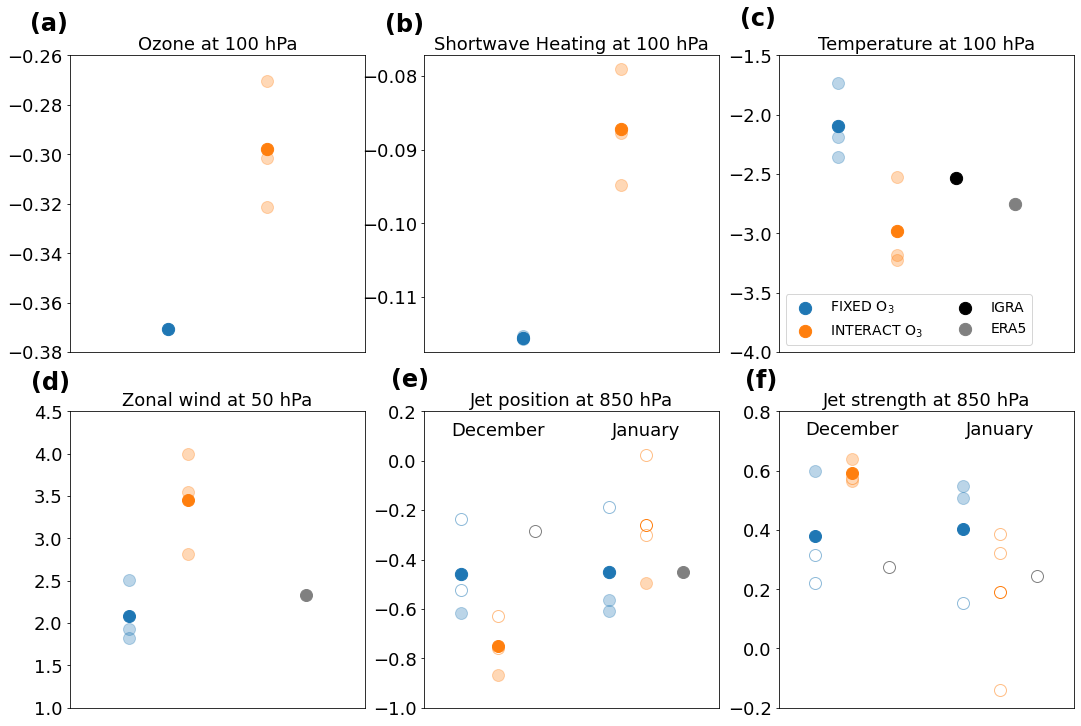

In [55]:
fig = plt.figure(figsize=(18,12))

plt.subplot(231)
plt.scatter(1, hist_trend_o3[10],  s=150, marker='o', color='tab:blue', label='FIXED O$_3$')

plt.plot(2, sw065_trend_o3[10], marker='o', markersize=12, color='tab:orange', alpha=0.3)
plt.plot(2, sw064_trend_o3[10], marker='o', markersize=12, color='tab:orange', alpha=0.3)
plt.plot(2, sw054_trend_o3[10], marker='o', markersize=12, color='tab:orange', alpha=0.3)
plt.scatter(2, moz_trend_o3[10], s=150, marker='o', color='tab:orange', label='INTERACT O$_3$')

ax=plt.gca(); ax.tick_params(axis='both', labelsize=18)
plt.xlim(0,3)
plt.ylim(-0.38, -0.26)
plt.xticks([], [])
#plt.yticks(np.arange(-0.7,0.4,0.1))
plt.title('Ozone at 100 hPa', fontsize=18)
plt.text(-0.4, -0.25, '(a)', fontsize=24, fontweight='bold')

plt.subplot(232)
plt.plot(1, sw060_trend_sw[10], marker='o', markersize=12, color='tab:blue', alpha=0.3)
plt.plot(1, sw061_trend_sw[10], marker='o', markersize=12, color='tab:blue', alpha=0.3)
plt.plot(1, jh019_trend_sw[10], marker='o', markersize=12, color='tab:blue', alpha=0.3)
plt.scatter(1, hist_trend_sw[10],  s=150, marker='o', color='tab:blue', label='FIXED O$_3$')

plt.plot(2, sw065_trend_sw[10], marker='o', markersize=12, color='tab:orange', alpha=0.3)
plt.plot(2, sw064_trend_sw[10], marker='o', markersize=12, color='tab:orange', alpha=0.3)
plt.plot(2, sw054_trend_sw[10], marker='o', markersize=12, color='tab:orange', alpha=0.3)
plt.scatter(2, moz_trend_sw[10], s=150, marker='o', color='tab:orange', label='INTERACT O$_3$')

ax=plt.gca(); ax.tick_params(axis='both', labelsize=18)
plt.xlim(0,3)
#plt.ylim(-0.384, -0.26)
plt.xticks([], [])
#plt.yticks(np.arange(-0.115,-0.075,0.005))
plt.title('Shortwave Heating at 100 hPa', fontsize=18)
plt.text(-0.4, -0.074, '(b)', fontsize=24, fontweight='bold')

plt.subplot(233)
plt.plot(1, sw060b_trend_t[10], marker='o', markersize=12, color='tab:blue', alpha=0.3)
plt.plot(1, sw061b_trend_t[10], marker='o', markersize=12, color='tab:blue', alpha=0.3)
plt.plot(1, jh019b_trend_t[10], marker='o', markersize=12, color='tab:blue', alpha=0.3)
plt.scatter(1, histb_trend_t[10],  s=150, marker='o', color='tab:blue', label='FIXED O$_3$')

plt.plot(2, sw065b_trend_t[10], marker='o', markersize=12, color='tab:orange', alpha=0.3)
plt.plot(2, sw064b_trend_t[10], marker='o', markersize=12, color='tab:orange', alpha=0.3)
plt.plot(2, sw054b_trend_t[10], marker='o', markersize=12, color='tab:orange', alpha=0.3)
plt.scatter(2, mozb_trend_t[10], s=150, marker='o', color='tab:orange', label='INTERACT O$_3$')

plt.scatter(3, igrab_trend_t[10], s=150, marker='o', color='k', label='IGRA')
#plt.plot(3, richb_trend_t[10], marker='^', markersize=12, color='k')
#plt.plot(3, raobb_trend_t[10], marker='d', markersize=12, color='k')
plt.scatter(4, erab_trend_t[10], s=150, marker='o', color=[0.5,0.5,0.5], label='ERA5')
plt.legend(fontsize=14, ncol=2)

ax=plt.gca(); ax.tick_params(axis='both', labelsize=18)
plt.xlim(0,5)
plt.ylim(-4, -1.5)
plt.xticks([], [])
#plt.yticks(np.arange(-0.7,0.4,0.1))
plt.title('Temperature at 100 hPa', fontsize=18)
plt.text(-0.65, -1.25, '(c)', fontsize=24, fontweight='bold')

plt.subplot(234)
plt.plot(1, sw060_trend_u[10], marker='o', markersize=12, color='tab:blue', alpha=0.3)
plt.plot(1, sw061_trend_u[10], marker='o', markersize=12, color='tab:blue', alpha=0.3)
plt.plot(1, jh019_trend_u[10], marker='o', markersize=12, color='tab:blue', alpha=0.3)
plt.plot(1, hist_trend[10], marker='o', markersize=12, color='tab:blue')

plt.plot(2, sw065_trend_u[10], marker='o', markersize=12, color='tab:orange', alpha=0.3)
plt.plot(2, sw064_trend_u[10], marker='o', markersize=12, color='tab:orange', alpha=0.3)
plt.plot(2, sw054_trend_u[10], marker='o', markersize=12, color='tab:orange', alpha=0.3)
plt.plot(2, moz_trend[10], marker='o', markersize=12, color='tab:orange')

plt.plot(4, era_trend_u[10], marker='o', markersize=12, color=[0.5,0.5,0.5])

ax=plt.gca(); ax.tick_params(axis='both', labelsize=18)
plt.xlim(0,5)
plt.ylim(1, 4.5)
plt.xticks([], [])
#plt.yticks(np.arange(-0.7,0.4,0.1))
plt.title('Zonal wind at 50 hPa', fontsize=18)
plt.text(-0.65, 4.75, '(d)', fontsize=24, fontweight='bold')

plt.subplot(235)
plt.plot(1, sw060_trend_lat[11], marker='o', markersize=12, color='tab:blue', alpha=0.3)
plt.plot(1, sw061_trend_lat[11], marker='o', markerfacecolor='None', markersize=12, color='tab:blue', alpha=0.5)
plt.plot(1, jh019_trend_lat[11], marker='o', markerfacecolor='None', markersize=12, color='tab:blue', alpha=0.5)
plt.scatter(1, hist_trend_lat[11],s=150,  marker='o', color='tab:blue', label='DEC')

plt.plot(2, sw065_trend_lat[11], marker='o', markerfacecolor='None', markersize=12, color='tab:orange', alpha=0.5)
plt.plot(2, sw064_trend_lat[11], marker='o', markerfacecolor='None', markersize=12, color='tab:orange', alpha=0.5)
plt.plot(2, sw054_trend_lat[11], marker='o', markersize=12, color='tab:orange', alpha=0.3)
plt.plot(2, moz_trend_lat[11], marker='o', markersize=12, color='tab:orange')

plt.plot(3, era_trend_lat[11], marker='o', markerfacecolor='None', markersize=12, color=[0.5,0.5,0.5])

plt.plot(5, sw060_trend_lat[0], marker='o', markersize=12, color='tab:blue', alpha=0.3)
plt.plot(5, sw061_trend_lat[0], marker='o', markerfacecolor='None', markersize=12, color='tab:blue', alpha=0.5)
plt.plot(5, jh019_trend_lat[0], marker='o', markersize=12, color='tab:blue', alpha=0.3)
plt.scatter(5, hist_trend_lat[0], s=150, marker='o', color='tab:blue', label='JAN')

plt.plot(6, sw065_trend_lat[0], marker='o', markersize=12, color='tab:orange', alpha=0.3)
plt.plot(6, sw064_trend_lat[0], marker='o', markerfacecolor='None', markersize=12, color='tab:orange', alpha=0.5)
plt.plot(6, sw054_trend_lat[0], marker='o', markerfacecolor='None', markersize=12, color='tab:orange', alpha=0.5)
plt.plot(6, moz_trend_lat[0], marker='o', markerfacecolor='None', markersize=12, color='tab:orange')

plt.plot(7, era_trend_lat[0], marker='o', markersize=12, color=[0.5,0.5,0.5])

ax=plt.gca(); ax.tick_params(axis='both', labelsize=18)
plt.xlim(0,8)
plt.ylim(-1, 0.2)
plt.xticks([], [])
#plt.yticks(np.arange(-0.7,0.4,0.1))
plt.title('Jet position at 850 hPa', fontsize=18)
#plt.legend(fontsize=14, ncol=2)
plt.text(2,0.1, 'December', fontsize=18, horizontalalignment='center')
plt.text(6,0.1, 'January', fontsize=18, horizontalalignment='center')
plt.text(-0.9, 0.3, '(e)', fontsize=24, fontweight='bold')

plt.subplot(236)
plt.plot(1, sw060_trend_up[11], marker='o', markersize=12, color='tab:blue', alpha=0.3)
plt.plot(1, sw061_trend_up[11], marker='o', markerfacecolor='None', markersize=12, color='tab:blue', alpha=0.5)
plt.plot(1, jh019_trend_up[11], marker='o', markerfacecolor='None', markersize=12, color='tab:blue', alpha=0.5)
plt.plot(1, hist_trend_up[11], marker='o', markersize=12, color='tab:blue')

plt.plot(2, sw065_trend_up[11], marker='o', markersize=12, color='tab:orange', alpha=0.3)
plt.plot(2, sw064_trend_up[11], marker='o', markerfacecolor='None', markersize=12, color='tab:orange', alpha=0.5)
plt.plot(2, sw054_trend_up[11], marker='o', markersize=12, color='tab:orange', alpha=0.3)
plt.plot(2, moz_trend_up[11], marker='o', markersize=12, color='tab:orange')

plt.plot(3, era_trend_up[11], marker='o', markerfacecolor='None', markersize=12, color=[0.5,0.5,0.5])

plt.plot(5, sw060_trend_up[0], marker='o', markersize=12, color='tab:blue', alpha=0.3)
plt.plot(5, sw061_trend_up[0], marker='o', markerfacecolor='None', markersize=12, color='tab:blue', alpha=0.5)
plt.plot(5, jh019_trend_up[0], marker='o', markersize=12, color='tab:blue', alpha=0.3)
plt.plot(5, hist_trend_up[0], marker='o', markersize=12, color='tab:blue')

plt.plot(6, sw065_trend_up[0], marker='o', markerfacecolor='None', markersize=12, color='tab:orange', alpha=0.5)
plt.plot(6, sw064_trend_up[0], marker='o', markerfacecolor='None', markersize=12, color='tab:orange', alpha=0.5)
plt.plot(6, sw054_trend_up[0], marker='o', markerfacecolor='None', markersize=12, color='tab:orange', alpha=0.5)
plt.plot(6, moz_trend_up[0], marker='o', markerfacecolor='None', markersize=12, color='tab:orange')

plt.plot(7, era_trend_up[0], marker='o', markerfacecolor='None', markersize=12, color=[0.5,0.5,0.5])

ax=plt.gca(); ax.tick_params(axis='both', labelsize=18)
plt.xlim(0,8)
plt.ylim(-0.2, 0.8)
plt.xticks([], [])
#plt.yticks(np.arange(-0.7,0.4,0.1))
plt.title('Jet strength at 850 hPa', fontsize=18)
plt.text(2,0.72, 'December', fontsize=18, horizontalalignment='center')
plt.text(6,0.72, 'January', fontsize=18, horizontalalignment='center')

plt.text(-0.9, 0.88, '(f)', fontsize=24, fontweight='bold')